Ερώτημα 1

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

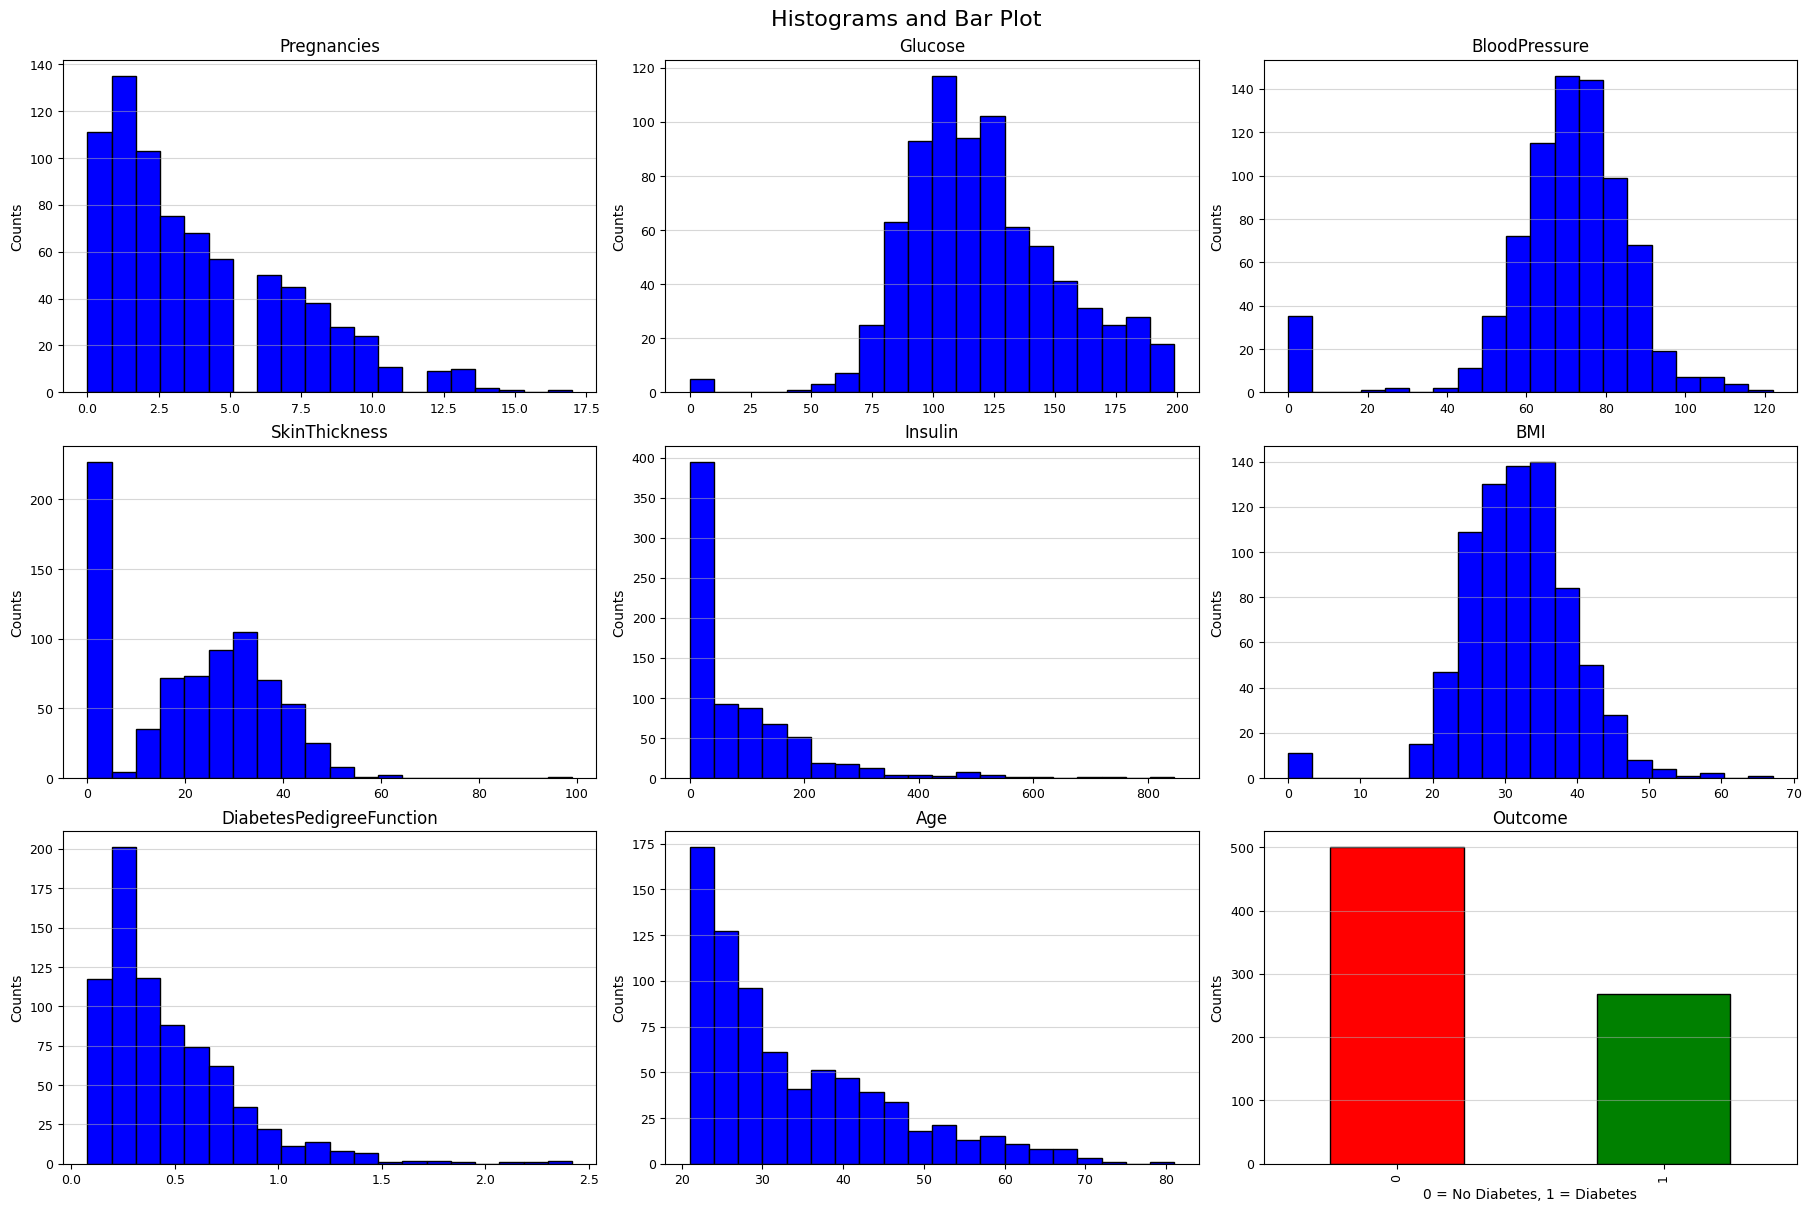

In [317]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso

# loading csv
df = pd.read_csv('diabetes.csv')

# checking 5 of the rows
print(df.head())


# finding the mean, std, min, max
print(df.describe())


# creating plots

# defing a variable with all columns except the Outcome
numeric_columns = df.columns[df.columns != 'Outcome']
# creating the plot (3x3, size 18x12, space between
# the axes) by defing two variables fig for figure and axes
fig, axes = plt.subplots(3, 3, figsize=(18, 12), constrained_layout=True)
axes = axes.flatten()
fig.suptitle("Histograms and Bar Plot", fontsize=16)

# creating the histograms (the subplots) for the variable numeric_columns
# using the for loop
for i, col in enumerate(numeric_columns):
     axes[i].hist(df[col], bins=20, color='blue', edgecolor='black')
     axes[i].set_title(f"{col}", fontsize=12)
     axes[i].set_ylabel("Counts", fontsize=10)
     axes[i].tick_params(axis='both', labelsize=9)
     axes[i].grid(axis='y', alpha=0.5)

# creating the bar chart (the last subplot) for the Outcome by defining the
# variable outcome_ax
outcome_ax = axes[len(numeric_columns)]
df['Outcome'].value_counts().plot(kind='bar', color=['red', 'green'], edgecolor='black', ax=outcome_ax)
outcome_ax.set_title("Outcome", fontsize=12)
outcome_ax.set_xlabel("0 = No Diabetes, 1 = Diabetes", fontsize=10)
outcome_ax.set_ylabel("Counts", fontsize=10)
outcome_ax.tick_params(axis='both', labelsize=9)
outcome_ax.grid(axis='y', alpha=0.5)

plt.show()






Ερώτημα 2

Η ποιότητα των δεδομένων κοιτάζοντας τις πληροφορίες από το πρώτο ερώτημα δεν είναι καλή, για τους εξής λόγους. Πρώτον, παρατηρώντας την ελάχιστη τιμή (min) διαπιστώνουμε πως είναι 0 σε κατηγορίες όπως την γλυκόζη, την αρτηριακή πίεση, το πάχος δέρματος στους τρικέφαλους, την συγκέντρωση της ινσουλίνης και τον δείκτη μάζας-σώματος που δεν είναι φυσιολογικό. Οπότε ίσως στην προκειμένη περίπτωση τα δεδομένα να είναι ελλιπή ή λάθος. Δεύτερον, υπολογίζοντας τον συντελεστή μεταβολής (CV) με την βοήθεια της τυπικής απόκλισης (std) και μέσης τιμής (mean) παρατηρεί κανείς πως το πάχος δέρματος στους τρικέφαλους έχει υψηλή διακύμανση (15,9/20,5=0,77), ενώ η ινσουλίνη (115,2/79,7=1,44) έχει πολύ υψηλή διακύμανση, καθώς CV>1, που σημαίνει ότι οι τιμές της διαφέρουν μεταξύ τους πολύ από τον μέσο όρο. Αυτό οφείλεται ίσως στην ύπαρξη ακραίων τιμών (outliers) ή σε λανθασμένες τιμές. Επομένως, δεν υπάρχει ομοιογένεια σε αυτά τα δεδομένα. Εν κατακλείδι, τα δεδομένα μας δεν είναι καλής ποιότητας και έτσι αυτό θα μπορούσε να οδηγήσει σε λανθασμένα αποτελέσματα και συμπεράσματα.

Ερώτημα 3

Η κατανομή που ακολουθεί η μεταβλητή Age είναι εκθετική. Συγκεντρώνει στην αριστερή πλευρά του γραφήματος τα περισσότερα δεδομένα, ενώ όσο προχωράει προς τα δεξιά μειώνονται δραματικά τα δεδομένα (right skeweness). Δηλαδή έχουμε πάρα πολλές τιμές για τους ανθρώπους νεαρής ηλικίας, ενώ για τους μεγαλύτερους είναι σημαντικά λίγες. Οπότε η κατανομή αυτή δεν θεωρείται καλή για την κατασκευή της συγκεκριμένης εφαρμογής, καθώς θα είναι αναξιόπιστη στις προβλέψεις της προς τους ηλικιωμένους.

Ερώτημα 4

In [318]:
# filtering the patients with glucose levels that are actually high. Based on
# research the high levels of glucose start at 140mg/dL

high_glucose_levels = df[df['Glucose'] > 140]
print(len(high_glucose_levels), "have high glucose levels")


# finding how many patients of these have actually diabetes
diabetes_count = high_glucose_levels['Outcome'].sum()
print(diabetes_count, "have diabetes")

#finding the percentage of the diabetics
high_glucose_levels['Outcome'].mean()*100


192 have high glucose levels
132 have diabetes


np.float64(68.75)

Εξετάσαμε όλους τους ασθενείς που έχουν υψηλά επίπεδα γλυκόζης και από αυτούς βρήκαμε το ποσοστό αυτών που έχουν διαβήτη (68,75%). Επομένως διαπιστώνεται πως αν ένας ασθενής έχει υψηλά επίπεδα γλυκόζης, είναι πολύ πιθανό να εμφανίσει διαβήτη.

Ερώτημα 5

In [319]:
# converting Dataframe to numpy arrays

input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

# splitting the data set into train set and test set (validation set) with
# percentage 70-30% and using the random state as seed with value 0

# defining the train set, the test set and the seed
seed=0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.shape, "train sets")
print(x_test.shape, "validation sets")


(537, 8) (537,) (231, 8) (231,)
(537, 8) train sets
(231, 8) validation sets


Ερώτημα 6

In [320]:
# creating a logistic regression model

model = LogisticRegression(max_iter=1000, random_state=seed)

# training the model on training set
model.fit(x_train, y_train)

# evaluating model on test

y_pred = model.predict(x_test)
y_pred

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 77.92


Ερώτημα 7

Accuracy for age group 0-25: 0.86
Accuracy for age group 26-50: 0.70
Accuracy for age group 50+: 0.90


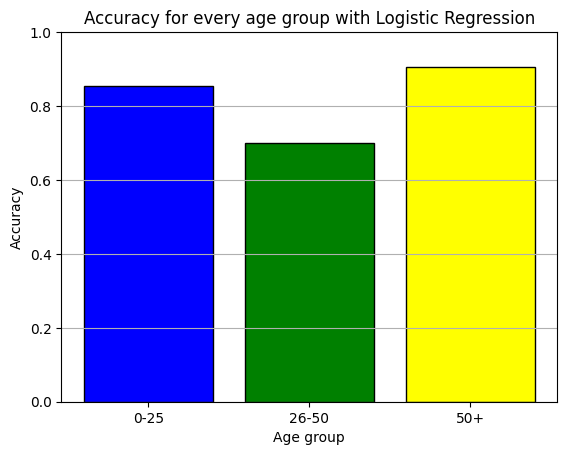

In [321]:
# checking whether the classifier works well for every age

# finding the ages of the test set from the df

ages_test = x_test[:, df.columns.get_loc("Age")]

# defining the age groups
age_groups = {
    "0-25": (ages_test <= 25),
    "26-50": ((ages_test > 25) & (ages_test <= 50)),
    "50+": (ages_test > 50)
}

# finding the accuracy for each age group
accuracies = {}
for group_name, condition in age_groups.items():
    group_indices = np.where(condition)[0]
    if len(group_indices) > 0:
        acc = accuracy_score(y_test[group_indices], y_pred[group_indices])
        accuracies[group_name] = acc
    else:
        accuracies[group_name] = np.nan

for group, acc in accuracies.items():
    print(f"Accuracy for age group {group}: {acc:.2f}")

# creating the bar plot for the groups together
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'yellow'], edgecolor='black')
plt.title("Accuracy for every age group with Logistic Regression")
plt.xlabel("Age group")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


Σύμφωνα με το bar plot της ακρίβειας ο ταξινομητής δεν δουλεύει εξίσου καλά για όλες τις ηλικιακές ομάδες. Αρχικά, παρατηρεί κανείς πως δουλεύει πολύ καλά στην ηλικιακή ομάδα 0-25 και ειδικά στην 50+. Ίσως τα χαρακτηριστικά αυτών των ομάδων να είναι πιο διακριτά γενικά. Από την άλλη, η απόδοση του ταξινομητή στην μεσαία ηλικιακή ομάδα, 26-50, δεν είναι τόσο καλή, ίσως γιατί υπάρχουν λάθη σε αυτήν την ομάδα ή δεν έχουμε επαρκή δεδομένα στο train set.

Ερώτημα 8

Το χειρότερο για τον ταξινομητή στην συγκεκριμένη εφαρμογή θα ήταν να μην προβλέπει ότι κάποιος ασθενής έχει διαβήτη ενώ στην ουσία έχει, σε αντίθεση με το να προβλέψει πως κάποιος έχει ενώ δεν έχει. Ειδικότερα αν κάποιου του γίνει η πρόβλεψη πως έχει διαβήτη, σίγουρα θα είναι δυσάρεστο γεγονός, αλλά θα προβεί σε περαιτέρω εξετάσεις για να τον διαχειριστεί και αντιμετωπίσει. Πολύ πιθανό μέσα από αυτές τις εξετάσεις να ανακαλύψει ότι τελικά δεν έχει. Οπότε δεν συνέβη κάτι τόσο τραγικό στην ζωή του. Από την άλλη, αν ο ταξινομητής προβλέψει για κάποιον ασθενή με διαβήτη ότι δεν έχει, ο συγκεκριμένος άνθρωπος πολύ πιθανό να αγνοήσει να κάνει και άλλες εξετάσεις που θα του αποκαλύψουν ότι έχει διαβήτη και έτσι να μην δεχτεί την απαραίτητη ιατρική βοήθεια εγκαίρως ή γενικά. Αυτό έχει ως αποτέλεσμα να κινδυνεύει η ζωή του, καθώς ο διαβήτης μπορεί να προκαλέσει νεφρική ανεπάρκεια και άλλες σοβαρές επιπλοκές.

Ερώτημα 9

In [322]:
accuracies = []


for seed in range(10):
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=seed)
    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train1, y_train1)
    y_pred = model.predict(x_test1)
    accuracy = accuracy_score(y_test1,y_pred)
    accuracies.append(accuracy)


mean_accuracy = np.mean(accuracies)
std_accuracy =  np.std(accuracies)

print(f"Mean accuracy: {mean_accuracy:.2f}")
print(f"Std accuracy: {std_accuracy:.2f}")



Mean accuracy: 0.77
Std accuracy: 0.02


Παρατηρούμε πολύ καλή απόδοση με τυπική απόκλιση πραγματικά πολύ χαμηλή

Ερώτημα 10

In [323]:
# training three models of Logistic Regression
# first with Lasso l1
# then with Ridge l2
# and then with Elastic Net

# using scikitlearn for feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# creating lists for every regularization


penalties = ['l1', 'l2', 'elasticnet']
accuracies = []

# training the model for each penalty from above

for penalty in penalties:
    if penalty != 'elasticnet':
        model = LogisticRegression(penalty=penalty, solver='liblinear', random_state=0, max_iter=1000
        )
    else:
        model = LogisticRegression(penalty=penalty, solver='saga', l1_ratio=0.5, random_state=0, max_iter=1000
        )

    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

accuracy_results = pd.DataFrame({
    'Penalty': penalties,
    'Accuracy': accuracies})

print(accuracy_results)





      Penalty  Accuracy
0          l1  0.783550
1          l2  0.779221
2  elasticnet  0.779221


# Μέρος 2 - Γραμμική Παλινδρόμηση

Ερώτημα 1

In [324]:
# loading csv file and defining x and y
df = pd.read_csv('diabetes.csv')
x = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].values
y = df['Glucose'].values

# splittting the data into data train and data validation 70-30% with seed 0
seed = 0
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=seed)

print(len(x_train2), "data train")
print(len(x_test2), "data valid")

537 data train
231 data valid


Ερώτημα 2

In [325]:
model = LinearRegression()
model.fit(x_train2, y_train2)
y_pred = model.predict(x_test2)
mse = mean_squared_error(y_test2, y_pred)
mae = mean_absolute_error(y_test2, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')




Mean Squared Error: 929.8883492746899
Mean Absolute Error: 23.599990462075155


Καλύτερη μετρική σε αυτην την περίπτωση είναι η ΜΑΕ γιατί υπολογίζει το μέσο όρο των απόλυτων τιμών των διαφορών των πραγματικών και προβλεπόμενων τιμών και έτσι δεν την ενοχλεί η ύπαρξη ακραίων τιμών που έχει το dataset.

Ερώτημα 3

In [330]:
# using scikitlearn

alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
lasso_acc= []

# using th for loop

for alpha in alphas:
    lasso_model = Lasso(alpha = alpha, max_iter=1000)
    lasso_model.fit(x_train2, y_train2)

    y_pred=lasso_model.predict(x_test2)

    mae=mean_absolute_error(y_test2, y_pred)
    lasso_acc.append(mae)

#making a data frame

lasso_res = pd.DataFrame({"alpha": alphas, "MAE": lasso_acc})

print(lasso_res)

   alpha        MAE
0    0.2  23.594203
1    0.4  23.588415
2    0.6  23.582629
3    0.8  23.576843
4    1.0  23.571058


Ερώτημα 4